In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
control_df = pd.read_csv('Moreno - control.csv')
control_df

,Measurement,Time,Number,Mean,SD,Score Change,Percentage Change,Comparison with baseline assessment
0,PHQ-9,Baseline,86,17.58,5.12,NaN,NaN,NaN
1,NaN,3 Months,74,9.85,6.31,7.33,44.0,<0.001
2,NaN,6 Months,75,7.59,6.82,9.99,57.0,<0.001
3,MADRS,Baseline,85,26.86,8.81,NaN,NaN,NaN
4,NaN,3 Months,67,15.69,11.82,11.17,42.0,<0.001
5,NaN,6 Months,68,13.46,12.57,13.40,50.0,<0.001
6,Q-Les-Q,Baseline,85,0.44,0.12,NaN,NaN,NaN
7,NaN,3 Months,75,0.55,0.17,0.11,25.0,<0.001
8,NaN,6 Months,74,0.64,0.19,0.20,45.0,<0.001
9,SDS,Baseline,86,15.52,6.42,NaN,NaN,NaN


In [86]:
print(control_df.describe())
print(control_df.info())

          Number       Mean         SD  Score Change  Percentage Change
count  12.000000  12.000000  12.000000      8.000000           8.000000
mean   77.000000  10.377500   6.144167      7.098750          44.625000
std     6.809085   7.985806   4.204896      4.890756          10.875103
min    67.000000   0.440000   0.120000      0.110000          25.000000
25%    74.000000   5.005000   3.887500      4.197500          40.500000
50%    75.000000   9.870000   6.620000      8.195000          44.500000
75%    85.000000  15.562500   8.097500     10.285000          51.750000
max    86.000000  26.860000  12.570000     13.400000          58.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Measurement                          4 non-null      object 
 1   Time                                 12 non-nul

In [78]:
tele_df = pd.read_csv('Moreno - tele.csv')
tele_df

,Measurement,Time,Number,Mean,SD,Score Change,Percentage Change,Comparison with baseline assessment
0,PHQ-9,Baseline,80,18.41,4.50,NaN,NaN,NaN
1,NaN,3 Months,65,8.45,5.45,9.97,54.0,<0.001
2,NaN,6 Months,69,4.94,5.30,13.47,73.0,<0.001
3,MADRS,Baseline,74,29.95,7.59,NaN,NaN,NaN
4,NaN,3 Months,61,16.33,11.75,13.62,45.0,<0.001
5,NaN,6 Months,64,9.52,10.73,20.43,68.0,<0.001
6,Q-Les-Q,Baseline,80,0.43,0.11,NaN,NaN,NaN
7,NaN,3 Months,66,0.59,0.17,0.16,37.0,<0.001
8,NaN,6 Months,70,0.72,0.20,0.29,67.0,<0.001
9,SDS,Baseline,80,17.34,6.63,NaN,NaN,NaN


Scoring of PHQ-9


0 – 4	None-minimal, 	None 


5 – 9	Mild, 	Watchful waiting; repeat PHQ-9 at follow-up 


10 – 14	Moderate, 	Treatment plan, considering counseling, follow-up and/or pharmacotherapy 


15 – 19	Moderately Severe, 	Active treatment with pharmacotherapy and/or psychotherapy 


20 – 27	Severe, 	Immediate initiation of pharmacotherapy and, if severe impairment or poor response to therapy, expedited referral to a mental health specialist for psychotherapy and/or collaborative management



(0.0, 27.0)

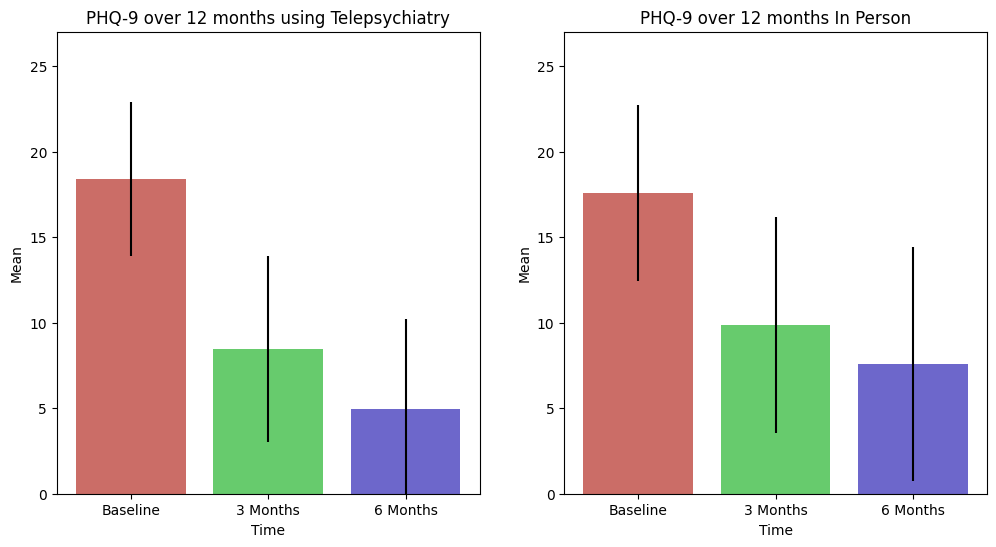

In [93]:
colors = sns.color_palette("hls", 3)

#putting the graphs onto on plot
fig, axes = plt.subplots(1,2, figsize=(12,6))
barplot_1 = sns.barplot(tele_df[0:3], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, ax=axes[0])
errors = np.array(tele_df['SD'][0:3])
for i, bar in enumerate(barplot_1.patches):
    bar_center = bar.get_x() + bar.get_width() / 2
    axes[0].errorbar(bar_center, tele_df['Mean'][i], yerr=errors[i], fmt='none', color='black')
axes[0].set_title("PHQ-9 over 12 months using Telepsychiatry")
axes[0].set_ylim(0, 27)

barplot_2 = sns.barplot(control_df[0:3], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, errorbar=("ci", 95), ax=axes[1])
errors = np.array(control_df['SD'][0:3])
for i, bar in enumerate(barplot_2.patches):
    bar_center = bar.get_x() + bar.get_width() / 2
    axes[1].errorbar(bar_center, control_df['Mean'][i], yerr=errors[i], fmt='none', color='black')
axes[1].set_title("PHQ-9 over 12 months In Person")
axes[1].set_ylim(0, 27)

The MADRS scoring instructions indicate that a total score ranging from 0 to 6 indicates that the patient is in the normal range (no depression), a score ranging from 7 to 19 indicates “mild depression,” 20 to 34 indicates “moderate depression,” a score of 35 and greater indicates “severe depression,” and a total score of 60 or greater indicates “very severe depression".

(0.0, 40.0)

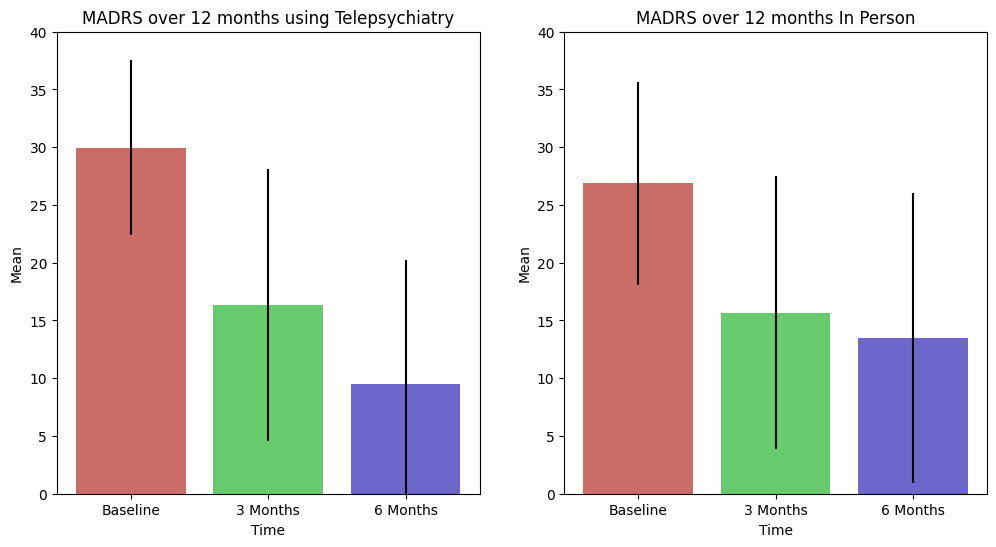

In [98]:
#putting the graphs onto on plot
fig, axes = plt.subplots(1,2, figsize=(12,6))
barplot_1 = sns.barplot(tele_df[3:6], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, ax=axes[0])
errors = np.array(tele_df['SD'][3:6])
for i, bar in enumerate(barplot_1.patches):
    bar_center = bar.get_x() + bar.get_width() / 2
    axes[0].errorbar(bar_center, tele_df['Mean'][3+i], yerr=errors[i], fmt='none', color='black')
axes[0].set_title("MADRS over 12 months using Telepsychiatry")
axes[0].set_ylim(0, 40)

barplot_2 = sns.barplot(control_df[3:6], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, errorbar=("ci", 95), ax=axes[1])
errors = np.array(control_df['SD'][3:6])
for i, bar in enumerate(barplot_2.patches):
    bar_center = bar.get_x() + bar.get_width() / 2
    axes[1].errorbar(bar_center, control_df['Mean'][3+i], yerr=errors[i], fmt='none', color='black')
axes[1].set_title("MADRS over 12 months In Person")
axes[1].set_ylim(0, 40)

SDS Scoring: Total score 0-30 (0 unimpaired, 30 highly impaired)


    Work/school (0-10)


    Social life (0-10)


    Family life/home responsibilities (0-10)

    
Scores of greater than or equal to 5 on any of the 3 scales; high scores are associated with significant functional impairment.

(0.0, 30.0)

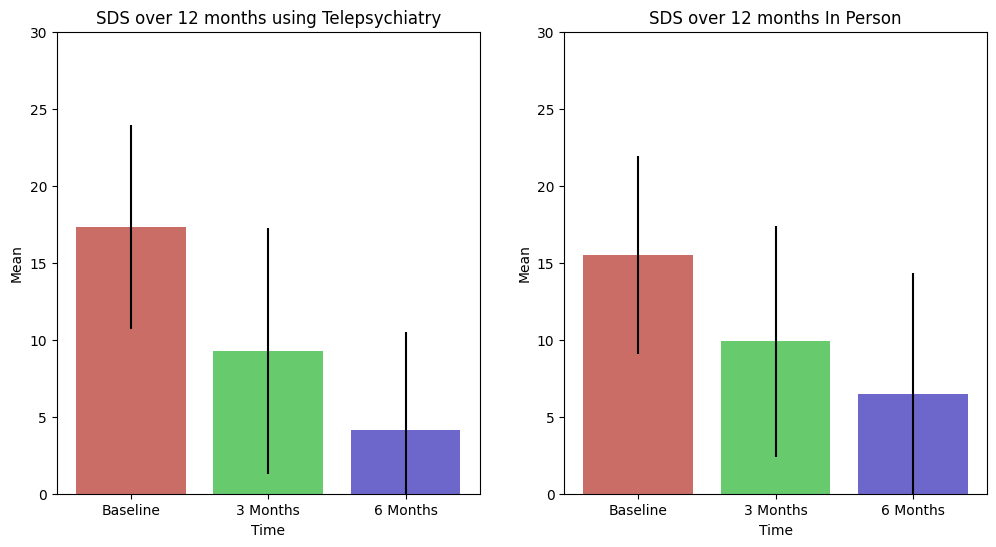

In [100]:
#putting the graphs onto on plot
fig, axes = plt.subplots(1,2, figsize=(12,6))
barplot_1 = sns.barplot(tele_df[9:12], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, ax=axes[0])
errors = np.array(tele_df['SD'][9:12])
for i, bar in enumerate(barplot_1.patches):
    bar_center = bar.get_x() + bar.get_width() / 2
    axes[0].errorbar(bar_center, tele_df['Mean'][9+i], yerr=errors[i], fmt='none', color='black')
axes[0].set_title("SDS over 12 months using Telepsychiatry")
axes[0].set_ylim(0, 30)

barplot_2 = sns.barplot(control_df[9:12], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, errorbar=("ci", 95), ax=axes[1])
errors = np.array(control_df['SD'][9:12])
for i, bar in enumerate(barplot_2.patches):
    bar_center = bar.get_x() + bar.get_width() / 2
    axes[1].errorbar(bar_center, control_df['Mean'][9+i], yerr=errors[i], fmt='none', color='black')
axes[1].set_title("SDS over 12 months In Person")
axes[1].set_ylim(0, 30)

Scoring of Q-Les-Q: 14 items are ranked by the patient individually on a scale of 1-5


To get a percentage value of the maximum and not a raw score, the total score is divided by 56


Measures the quality of life and is not a depression metric

(0.0, 5.0)

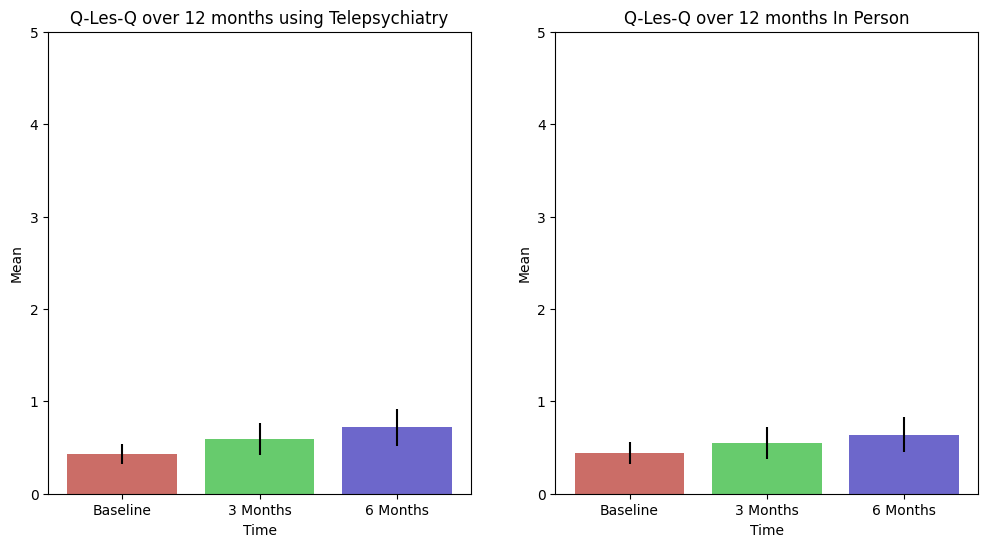

In [103]:
#putting the graphs onto on plot
fig, axes = plt.subplots(1,2, figsize=(12,6))
barplot_1 = sns.barplot(tele_df[6:9], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, ax=axes[0])
errors = np.array(tele_df['SD'][6:9])
for i, bar in enumerate(barplot_1.patches):
    bar_center = bar.get_x() + bar.get_width() / 2
    axes[0].errorbar(bar_center, tele_df['Mean'][6+i], yerr=errors[i], fmt='none', color='black')
axes[0].set_title("Q-Les-Q over 12 months using Telepsychiatry")
axes[0].set_ylim(0, 5)

barplot_2 = sns.barplot(control_df[6:9], x='Time', y='Mean', palette=colors, hue = 'Time', legend =False, errorbar=("ci", 95), ax=axes[1])
errors = np.array(control_df['SD'][6:9])
for i, bar in enumerate(barplot_2.patches):
    bar_center = bar.get_x() + bar.get_width() / 2
    axes[1].errorbar(bar_center, control_df['Mean'][6+i], yerr=errors[i], fmt='none', color='black')
axes[1].set_title("Q-Les-Q over 12 months In Person")
axes[1].set_ylim(0, 5)

(0.0, 30.0)

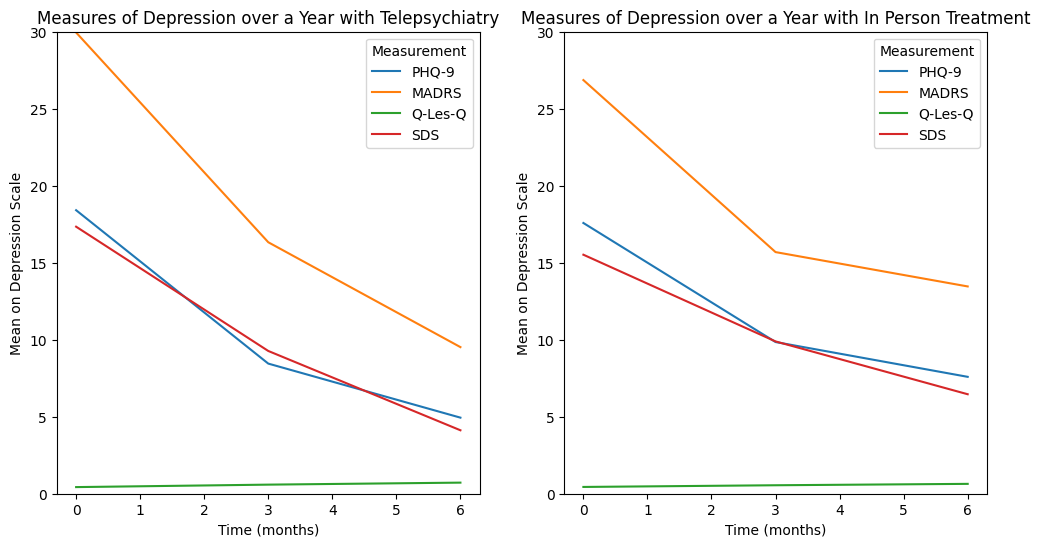

In [104]:
control_df['Time'] = control_df['Time'].replace('Baseline', 0)
control_df['Time'] = control_df['Time'].replace('3 Months', 3)
control_df['Time'] = control_df['Time'].replace('6 Months', 6)

tele_df['Time'] = tele_df['Time'].replace('Baseline', 0)
tele_df['Time'] = tele_df['Time'].replace('3 Months', 3)
tele_df['Time'] = tele_df['Time'].replace('6 Months', 6)

def replace(df, measurement, start, end):
    df.loc[start:end, 'Measurement'] = measurement 
    return df

control_df = replace(control_df, "PHQ-9", 0, 2)
control_df = replace(control_df, "MADRS", 3, 5)
control_df = replace(control_df, "Q-Les-Q", 6, 8)
control_df = replace(control_df, "SDS", 9, 11)

tele_df = replace(tele_df, "PHQ-9", 0, 2)
tele_df = replace(tele_df, "MADRS", 3, 5)
tele_df = replace(tele_df, "Q-Les-Q", 6, 8)
tele_df = replace(tele_df, "SDS", 9, 11)

tele_df.rename(columns={'Time': 'Time (months)', 'Mean': 'Mean on Depression Scale'}, inplace=True)
control_df.rename(columns={'Time': 'Time (months)', 'Mean': 'Mean on Depression Scale'}, inplace=True)

fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.lineplot(data=tele_df, x="Time (months)", y="Mean on Depression Scale", hue = "Measurement", ax=axes[0])
axes[0].set_title("Measures of Depression over a Year with Telepsychiatry")
axes[0].set_ylim(0, 30)
sns.lineplot(data=control_df, x="Time (months)", y="Mean on Depression Scale", hue = "Measurement", ax=axes[1])
axes[1].set_title("Measures of Depression over a Year with In Person Treatment")
axes[1].set_ylim(0, 30)

Overall, the values of all of the depression metrics show a significant decrease with both in person treatment and telepsychiatric treatment. Actually, the telepsychiatric patients showed a larger decrease in the depression metrics. However, one important thing to note in the Q-Les-Q scoring is that despite marked improvements in the depression metrics and an increase in Q-Les-Q, quality of life still remained poor for patients over this time frame.

(0.0, 30.0)

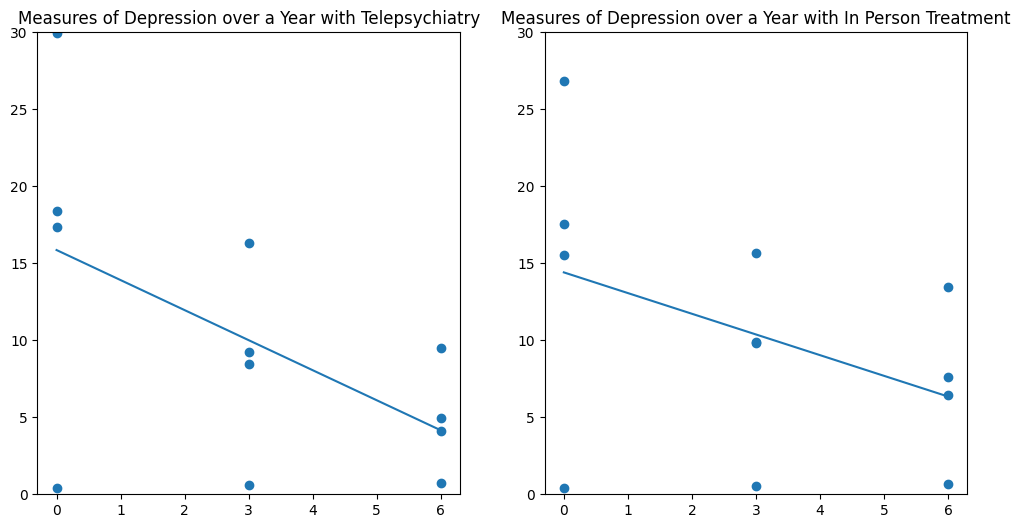

In [115]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].scatter(data=tele_df, x="Time (months)", y="Mean on Depression Scale")
axes[0].set_title("Measures of Depression over a Year with Telepsychiatry")
axes[0].set_ylim(0, 30)
axes[0].plot(np.unique(tele_df['Time (months)']), np.poly1d(np.polyfit(tele_df['Time (months)'], tele_df['Mean on Depression Scale'], 1))(np.unique(tele_df['Time (months)'])))

axes[1].scatter(data=control_df, x="Time (months)", y="Mean on Depression Scale")
axes[1].set_title("Measures of Depression over a Year with In Person Treatment")
axes[1].plot(np.unique(control_df['Time (months)']), np.poly1d(np.polyfit(control_df['Time (months)'], control_df['Mean on Depression Scale'], 1))(np.unique(control_df['Time (months)'])))
axes[1].set_ylim(0, 30)